<a href="https://colab.research.google.com/github/ahammedshaneebnk/ML_Linear_Regression_Exercises/blob/main/single_variate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question:**

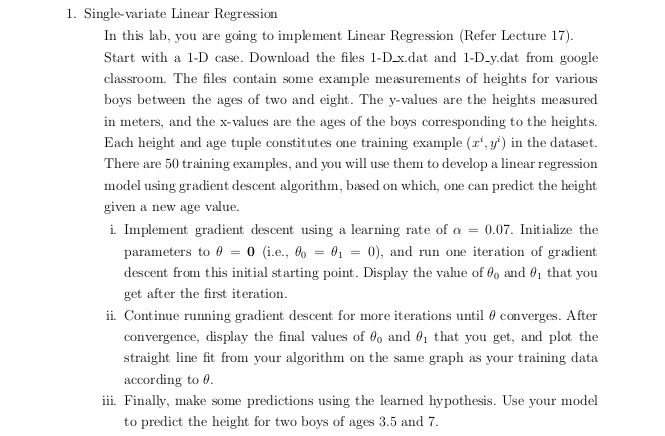

# **Answer:**

## **Data Analysis**

### *Read Data*

In [24]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# reading data from the file '1-D_x.dat'
# and converting into to pandas dataframe
df = pd.read_csv('1-D_x.dat', header=None)

# reading data from the file '1-D_y.dat' and adding it as another column
# with the existing dataframe with column title 'Height'
df['Height'] = pd.read_csv('1-D_y.dat', header=None)

# renaming the first column header into 'Age'
df.rename(columns={0:'Age'}, inplace=True)

# priting the first 10 instances
print(df.head(10))

        Age    Height
0  2.065875  0.779189
1  2.368409  0.915968
2  2.539993  0.905384
3  2.542080  0.905661
4  2.549079  0.938989
5  2.786688  0.966847
6  2.911682  0.964368
7  3.035627  0.914459
8  3.114670  0.939339
9  3.158239  0.960750


### *Basic Details*

In [25]:
df.shape

(50, 2)

* Number of **Rows = 50**
* Number of **Columns = 2**

In [26]:
df.describe()

,Age,Height
count,50.000000,50.000000
mean,4.923572,1.064686
std,1.727489,0.119132
min,2.065875,0.779189
25%,3.414546,0.964838
50%,4.832926,1.077205
75%,6.312771,1.144418
max,7.930636,1.302993


* The Basic **Statistical Details** of the dataset have been shown above.

### *Check for Null Values*

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     50 non-null     float64
 1   Height  50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


* From above, we can see that our dataset **does not have any null value**.

### *Scatter Plot*

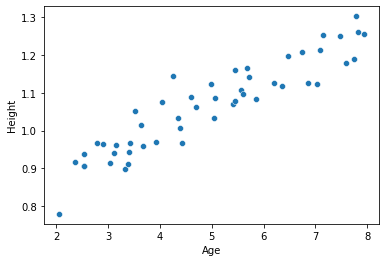

In [28]:
# scatter plot
# x axis: Age and y axis: Height
sns.scatterplot(data=df, x='Age', y='Height')

* As per the above plot, it is observed that most of the time, as age increases, height also increases.
* Also, it gives an **intuition to fit a line** through the data points.

### *Correlation Matrix*

In [29]:
# to find correlation between age and height
# method used is Pearson's as it is a standard method
df.corr(method='pearson')

,Age,Height
Age,1.000000,0.926317
Height,0.926317,1.000000


* Above correlation matrix suggests that the height **positively and highly correlated** with the age as the correlation coefficient is around 0.9.
* From the scatter plot and correlation matrix, we can preliminarily conclude that our **data is suitable for linear regression**. 

## **Theory**

### *Single-variate Linear Regression*

* Linear Regression comes under supervised machine learning system.
* It assumes there exists a **linear relationship** between the dependent and independent variables.
* The independent variables are referred to as features whereas dependent variable is often called as target variable.
* The linear regression model in which there is only one feature is known as **single-variate** linear regression.

### *Hypothesis*

* For single-variate linear regression, below hypothesis can be taken as the model.
* $y = h(\theta) = \theta_0+ \theta_1x$
* Here, $'y'$ is the **target variable** (Height) and $'x'$ is the **feature** (Age).
* $'\theta_0'$ and $'\theta_1'$ are the parameters we need to find out in order to establish the linear relationship between $y$ and $x$.

### *Cost Function*

* $J(\theta) = \frac{1}{2n}\sum_{i=1}^{n} (h_{\theta}(x^{(i)}) - y^{(i)})^2$

* This can also be written as follows:

* $J(\theta) = \frac{1}{2n}\sum_{i=1}^{n} (\theta_0 + \theta_1*x^i - y^i)^2$

* We need to find out the parameters, $\theta_0$ and $\theta_1$ so that the value of the **cost function $J(\theta)$ is minimum**.

### Gradient Descent Algorithm

* Gradient Descent is an **iterative algorithm** which is used to update the parameters by leading into the **steepest descent** by taking gradient at each point.

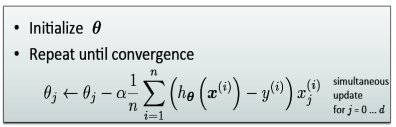

* We will stop the iteration when convergance is attained.
* We will decide whether the **convergance** is attained or not by looking at the difference between the current parameter and their previous values. If the difference is very very less, then we will stop the iteration.

## **Gradient Descent Implementation**

### *Initialization*

In [30]:
# w0 and w1 are the parameters
w0 = 0
w1 = 0

# learning rate is set to 0.7
lr = 0.07

# number of instances
n = df.shape[0]

# X and Y values are assigned for simplicity
X = df['Age']
Y = df['Height']

# Cost Function values List
J = []

# Difference of Parameter values List
Diff = []

### *First Iteration*

In [31]:
# function to find the predicted value or h
# Arguments: current parameters and feature value
def find_h(theta0, theta1, x):
  return (theta0 + (theta1 * x))

In [32]:
# counting the number of iterations with variable 'count'
count = 1

# temporary assignments to refer back to check the difference
temp0 = w0
temp1 = w1

# update of w0
w0 = w0 - lr * (1/n) * np.sum(find_h(w0,w1,X) - Y)

# update of w1
w1 = w1 - lr * (1/n) * np.sum(np.multiply(X, find_h(w0,w1,X) - Y))

# finding cost and appending to the list J
j = (1/(2*n)) * np.sum(np.square(find_h(w0,w1,X) - Y))
J.append(j)

# finding the difference and appending to the list Diff
diff = np.sqrt((w0 - temp0)**2 + (w1 - temp1)**2)
Diff.append(diff)

# display the details of 1st iteration
print(f"iter = {count}\tJ = {np.round(j, 6)}\tw0 = {np.round(w0, 6)}\tw1 = {np.round(w1, 6)}\tdiff = {np.round(diff, 6)}")

iter = 1	J = 0.408938	w0 = 0.074528	w1 = 0.354336	diff = 0.362089


### *Remaining Iterations*

In [33]:
# we will declare the convergance is attained when the difference of
# parameters is less than 0.0001
# The difference will be found by Eucledian Distance concept

while diff>0.0001:

  # update the iteration count
  count = count + 1

  temp0 = w0
  temp1 = w1

  w0 = w0 - lr * (1/n) * np.sum(find_h(w0,w1,X) - Y)
  w1 = w1 - lr * (1/n) * np.sum(np.multiply(X, find_h(w0,w1,X) - Y))

  j = (1/(2*n)) * np.sum(np.square(find_h(w0,w1,X) - Y))
  J.append(j)

  print(f"iter = {count}\tJ = {np.round(j, 6)}\tw0 = {np.round(w0, 6)}\tw1 = {np.round(w1, 6)}\tdiff = {np.round(diff, 6)}")
  
  diff = np.sqrt((w0 - temp0)**2 + (w1 - temp1)**2)
  Diff.append(diff)

iter = 2	J = 0.306711	w0 = 0.021717	w1 = 0.053058	diff = 0.362089
iter = 3	J = 0.220532	w0 = 0.076439	w1 = 0.305838	diff = 0.305871
iter = 4	J = 0.169827	w0 = 0.040209	w1 = 0.090412	diff = 0.258635
iter = 5	J = 0.124324	w0 = 0.080762	w1 = 0.270669	diff = 0.218452
iter = 6	J = 0.09942	w0 = 0.05635	w1 = 0.116558	diff = 0.184763
iter = 7	J = 0.075073	w0 = 0.086762	w1 = 0.245028	diff = 0.156033
iter = 8	J = 0.062995	w0 = 0.070768	w1 = 0.134708	diff = 0.13202
iter = 9	J = 0.049727	w0 = 0.093915	w1 = 0.226197	diff = 0.111473
iter = 10	J = 0.043957	w0 = 0.08391	w1 = 0.147156	diff = 0.094372
iter = 11	J = 0.036545	w0 = 0.101847	w1 = 0.21224	diff = 0.079672
iter = 12	J = 0.033831	w0 = 0.096097	w1 = 0.155541	diff = 0.06751
iter = 13	J = 0.029552	w0 = 0.110291	w1 = 0.20177	diff = 0.05699
iter = 14	J = 0.028282	w0 = 0.107559	w1 = 0.16103	diff = 0.04836
iter = 15	J = 0.025705	w0 = 0.119059	w1 = 0.193799	diff = 0.040832
iter = 16	J = 0.025095	w0 = 0.11846	w1 = 0.16446	diff = 0.034728
iter = 17	J = 0

### *Cost Function Plot*

Text(0, 0.5, 'Cost Function, J')

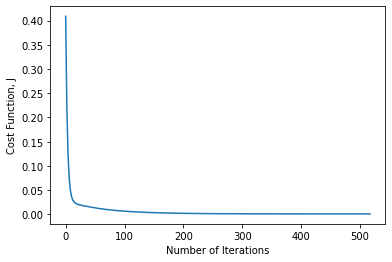

In [34]:
# plot of cost function after each iteration
# x axis: number of iterations
# y axis: cost function, J
plt.figure(1)
plt.plot(J)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost Function, J')

* From the above plot, it is evident that the **cost function was found to be decreasing after each iteration** which is the desired outcome.
* After around **200** iterations, the cost function value almost remains constant.

### *Fitted Line Plot*

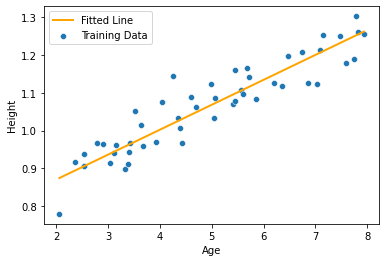

In [35]:
# plot which shows the fitted line on the data scatter plot
plt.figure(2)

# data scatter plot
sns.scatterplot(data=df, x='Age', y='Height')

# line plot
plt.plot(X, find_h(w0,w1,X), 'orange', lw=2)

# plot legends
plt.legend(['Fitted Line', 'Training Data'])

## **Prediction on New Data**

* We need to find out the heights corresponding to the ages 3.5 and 7.

In [36]:
# including the new data (features) into array
predX = np.array([3.5, 7])

# predicted values containing array
predY = find_h(w0, w1, predX)

# display the predicted values
for i in range(len(predX)):
  print(f"Predicted Height for Age = {predX[i]} is {predY[i]}")

Predicted Height for Age = 3.5 is 0.969125517869251
Predicted Height for Age = 7.0 is 1.200645597757482


## **Conclusion:**

* The given dataset has been studied and analyzed.
* The data given is found to be good for proceeding with the linear regression as the correlation between the dependent variable and independent variable was 0.9, and the scatter plot of the data also gave the same intuition.
* The theory behind linear regression and gradient descent has been reviewed.
* The learning rate was fixed at 0.07 and all the parameters were intialized with 0.
* The values obtained after first iteration of the gradient descent is given below.
```
iter = 1    J = 0.408938    w0 = 0.074528    w1 = 0.354336    diff = 0.362089
```
* We decided that the convergence will attain when the difference between the current parameter values and previous becomes less than 0.0001, and this was checked by the Eucledian distance concept.
* The gradient descent was run till convergence and there were 518 iterations.
* The cost function with respect to the number of iterations were plotted and it was observed that the cost function value remains constant after around 200 iterations which means we could have done better with the convergence criteria set initially.
* After final iterations, the values obtained are shown below.
```
iter = 518    J = 0.000996    w0 = 0.737605    w1 = 0.066149    diff = 0.000101
```
* The scatter plot along with the fitted line graph were plotted.
* The predictions for the new data have been conducted and the results obtained as folows.
```
Predicted Height for Age = 3.5 is 0.969125517869251
Predicted Height for Age = 7.0 is 1.200645597757482
```

**Submitted By:**
> Ahammed Shaneeb N K

> M.Tech, Artificial Intelligence

> College of Engineering, Trivandrum